In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

# Data Processing

In [2]:
train_X =pd.read_csv('train_X_cat.csv',index_col = 0)
train_y_sales =pd.read_csv('train_y_sales.csv')
train_y_sales = train_y_sales.sales
train_y_logsales =pd.read_csv('train_y_logsales.csv',index_col = 0)
train_y_logsales = train_y_logsales.sales

# Model Definition (Function)

Function is created to do k-fold (k=10) on the training data set based on different hyperparameters. Hyperparameters include the learning rate and n estimators.

In [3]:
from sklearn.model_selection import KFold
def Data_KFold_MSE(X,Y,k,alpha,n):
    kf = KFold(n_splits=k)
    test_mse = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        gbr = GradientBoostingRegressor(learning_rate=alpha, n_estimators=n, random_state = 8)
        gbr.fit(X_train, y_train)
        
        y_pred = gbr.predict(X_test)
        mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
        test_mse.append(mse)

    return np.mean(test_mse)

# Finding Best Hyperparameter

In [4]:
alpha = [0.001,0.01,0.1,1]
n_est = [10,100,1000]
MSE_logsales = []
for i in alpha:
    for r in n_est:
        MSE_logsales.append([i,r,Data_KFold_MSE(train_X, train_y_logsales,10,i,r)])
MSE_logsales

[[0.001, 10, 7142.998226578546],
 [0.001, 100, 6998.480755582214],
 [0.001, 1000, 4807.948063505493],
 [0.01, 10, 6997.6597463280295],
 [0.01, 100, 4793.7295440783255],
 [0.01, 1000, 907.326765424103],
 [0.1, 10, 4649.810825533643],
 [0.1, 100, 900.8407039909378],
 [0.1, 1000, 861.9283467509513],
 [1, 10, 1041.8583315775809],
 [1, 100, 1897.4164069733633],
 [1, 1000, 2106.5672490608185]]

In [5]:
length = len(MSE_logsales)
minimum = 100000
best = [0,0,0]
for i in range(length):
    if MSE_logsales[i][2] < minimum:
        minimum = MSE_logsales[i][2]
        best = MSE_logsales[i]
best

[0.1, 1000, 861.9283467509513]

In [6]:
# Based on the previous results, the best parameters are
# learning_rate = 0.1
# n_estimators = 1000
# This step will determine the best learning within the range of the learning rate found
alpha_logsales = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
MSE_logsales = []
for i in alpha_logsales:
    MSE_logsales.append(Data_KFold_MSE(train_X, train_y_logsales,10,i,1000))
MSE_logsales

[861.9283467509513,
 865.7243649379336,
 984.4036402185538,
 1034.718170239858,
 884.2942344010298,
 1165.4048266326736,
 1875.3227167696004,
 1549.7255122856748,
 1445.2728576988366]

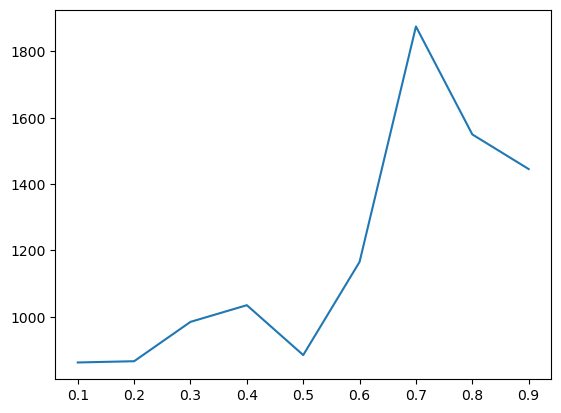

In [7]:
# Plotting the MSE values for the alpha values tested
plt.plot(alpha_logsales,MSE_logsales)
plt.show()

In [8]:
print(alpha_logsales[np.argmin(MSE_logsales)],MSE_logsales[np.argmin(MSE_logsales)])

0.1 861.9283467509513


Hence the best hyperparameter is:
1. Learning rate = 0.1
2. n estimator = 1000

Best MSE = 861.9283467509513

In [10]:
# Using the entire training data set to train the model for predicting
gbr = GradientBoostingRegressor(learning_rate=0.2, n_estimators=1000, random_state = 8)
gbr.fit(train_X, train_y_logsales)

# Testing the MSE of the new model using only training data
y_pred = gbr.predict(train_X)
mse = mean_squared_error(np.exp(train_y_logsales), np.exp(y_pred)) 
mse

2.7861939324794442